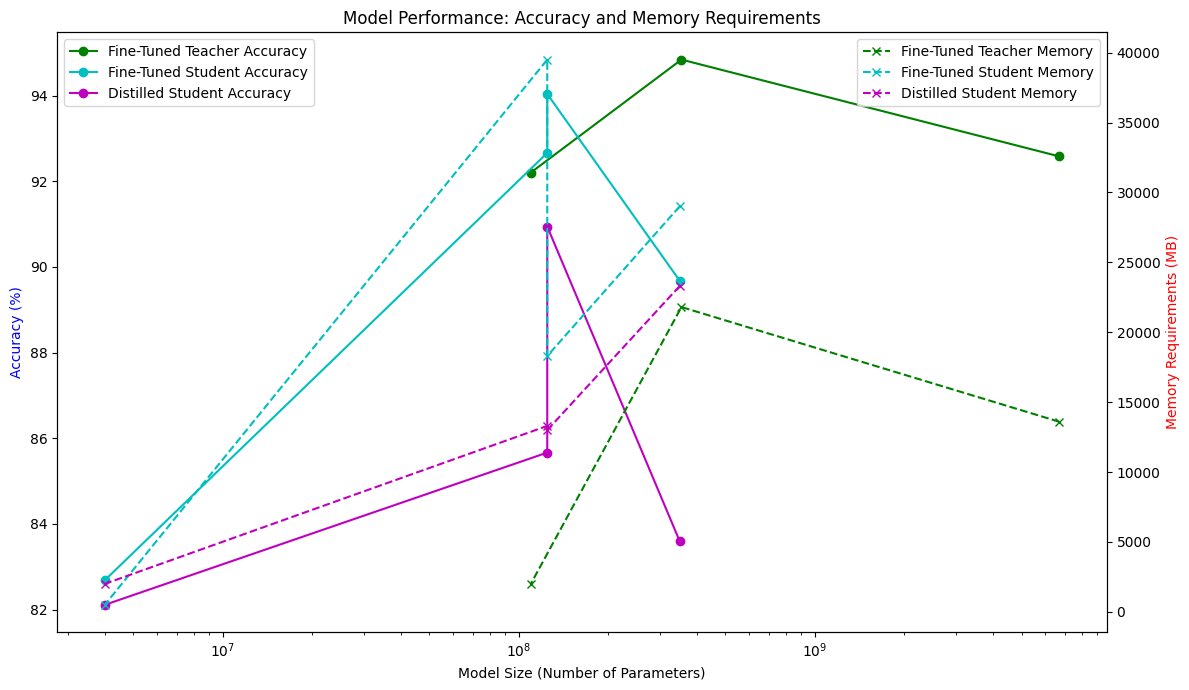

In [64]:
import matplotlib.pyplot as plt
import numpy as np

def plot_model_performance(data):
    """
    Plots model performance (accuracy and memory requirements) for different model types and sizes.

    Parameters:
    data (dict): A dictionary where keys are model types and values are lists of tuples.
                 Each tuple contains (num_parameters, accuracy, memory_requirements).
                 Example format:
                 {
                     "Teacher": [(1e9, 92.5, 1024), (5e8, 90.0, 768), ...],
                     "Student": [(2.5e8, 88.0, 256), (1e8, 85.0, 128), ...],
                     ...
                 }
    """

    fig, ax1 = plt.subplots(figsize=(12, 7))

    # Set up for dual axis
    ax2 = ax1.twinx()

    colors = {
        "Teacher": 'r',
        "Student": 'b',
        "Fine-Tuned Teacher": 'g',
        "Fine-Tuned Student": 'c',
        "Distilled Student": 'm'
    }

    for model_type, values in data.items():
        sizes, accuracies, memories = zip(*values)
        color = colors.get(model_type, 'k')  # default to black if type not in colors
        accuracies = [a*100 for a in accuracies]

        ax1.plot(sizes, accuracies, marker='o', linestyle='-', color=color, label=f"{model_type} Accuracy")
        ax2.plot(sizes, memories, marker='x', linestyle='--', color=color, label=f"{model_type} Memory")

    ax1.set_xscale('log')
    ax1.set_xlabel('Model Size (Number of Parameters)')
    ax1.set_ylabel('Accuracy (%)', color='b')
    ax2.set_ylabel('Memory Requirements (MB)', color='r')

    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')

    plt.title('Model Performance: Accuracy and Memory Requirements')
    plt.tight_layout()
    plt.savefig('imgs/model_performance.png', dpi=300)
    plt.show()

# Example data
data = {
    # "Teacher": [(7e9, 92.5, 7000), (5e9, 91.0, 5000), (3e9, 89.5, 3000), (2e9, 88.0, 2000), (1e9, 85.0, 1000)],
    # "Student": [(1e9, 88.0, 1000), (5e8, 86.5, 500), (2.5e8, 85.0, 250), (1e8, 83.0, 100), (5e7, 80.0, 50)],
    "Fine-Tuned Teacher": [(6.7e9, 0.9258, 13600), (355e6, 0.94839, 21800), (110e6, 0.922018, 2000)],
    "Fine-Tuned Student": [(350e6, 0.896789, 29000), (125e6, 0.940367, 18300), (125e6, 0.926606, 39500), (4e6, 0.826835, 500)],
    "Distilled Student": [(350e6, 0.836009, 23300), (125e6, 0.909404, 13000), (125e6, 0.856651, 13300), (4e6, 0.821101, 2000)]
}

plot_model_performance(data)
